# **1 - Radiation lesson**
Radiation component:
- Skyview factor
- Shortwave radiation
- Clearness index
- Longwave radiation
- Net radiation
- Raster radiation (longwave only)

## **Skyview factor**
Complete documentation: https://osf.io/krvx3/
### **Component Description**
This module computes the portion of visible sky for each pixel of the map. The skyview factor is a value in the range 0 to 1.

#### **Detailed Inputs description**
The input file is a raster map. Supported raster formats are: .tif and .asc.
In the input folder there has to be a file containing the map projection information.
This file has extension .prj and its name has to be the same of the raster file. The .prj file can be downloaded from
https://epsg.io/

#### **The map of the corrected elevation model**
The raster map of the corrected elevation model. This map is obtained cutting the output of the Pitfiller module on the basin mask.
#### **Detailed Outputs description**
The output file can be either .tif or .asc. 
In the first case it is necessary to manually add the .prj file in the output folder. 
In the second case the .prj file is written by default.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

Set the current (and correct) directory

In [10]:
projFolder = "/home/drugo/Sim/OMS_Project_ET/"     
os.chdir(projFolder)

In [11]:
# %load simulation/Radiation/SkyviewFactor.sim
import static oms3.SimBuilder.instance as OMS3
def home = oms_prj
OMS3.sim {
	resource "$oms_prj/lib"
	model() { 
		components {            
			"reader_pit"            	 	"org.jgrasstools.gears.io.rasterreader.OmsRasterReader"
			"skyview"						"org.jgrasstools.hortonmachine.modules.hydrogeomorphology.skyview.OmsSkyview"
			"writer_skyview"         		"org.jgrasstools.gears.io.rasterwriter.OmsRasterWriter"			                     
			}  
			parameter{   
				"reader_pit.file"           "${home}/data/dem.tif"				         
				"writer_skyview.file"		"${home}/output/Radiation/skyviewRaster.asc"        
				}
				connect {        
					"reader_pit.outRaster"	"skyview.inElev"
					"skyview.outSky"		"writer_skyview.inRaster"
					}
			}
	}




SyntaxError: invalid syntax (<ipython-input-11-1ae2a771c2f5>, line 2)

Run the .sim file 'SkyviewFactor.sim' using the console or the following docker command

In [12]:
!docker run --rm -it -v $(pwd):/work omslab/oms simulation/Radiation/SkyviewFactor.sim

build/ folder exists: project already built.
Reading coverage: dem.asc
Finished.
working on skyview
20%...
40%...
60%...
80%...
100%...
Finished.
Writing coverage: skyviewRaster.asc
Jun 06, 2019 1:36:42 PM java.util.prefs.FileSystemPreferences$1 run
INFO: Created user preferences directory.
Finished.

*********************************
***     END OF SIMULATION     ***
*********************************



In [13]:
raster_path = 'output/Radiation/skyviewRaster.asc'
with open(raster_path, 'r') as raster:
    raster_header = raster.readlines()[:6]
raster_header = [item.strip().split()[-1] for item in raster_header]
raster_cols = int(raster_header[0])
raster_rows = int(raster_header[1])
raster_xll = float(raster_header[2])
raster_yll = float(raster_header[3])
raster_cs = float(raster_header[4])
raster_nodata = float(raster_header[5])
raster_array = np.loadtxt(raster_path, dtype=np.float, skiprows=6)
raster_array[raster_array == raster_nodata] = np.nan

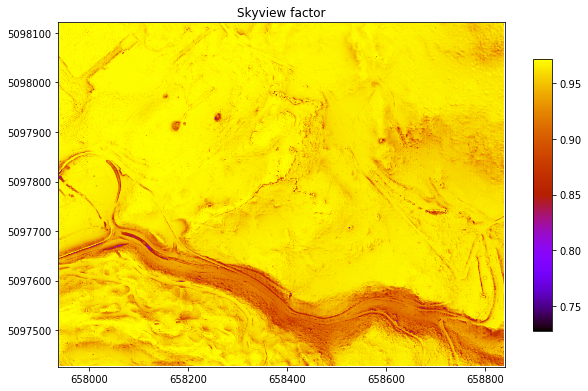

In [14]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_title('Skyview factor')
raster_extent = [
    raster_xll, raster_xll + raster_cols * raster_cs,
    raster_yll, raster_yll + raster_rows * raster_cs]
img_plot = ax.imshow(raster_array, extent=raster_extent, cmap='gnuplot')
cbar = plt.colorbar(img_plot, orientation='vertical', shrink=0.5, aspect=14)
cbar.set_label('')
plt.show()

In [15]:
raster_path = 'data/dem.asc'
with open(raster_path, 'r') as raster:
    raster_header = raster.readlines()[:6]
raster_header = [item.strip().split()[-1] for item in raster_header]
raster_cols = int(raster_header[0])
raster_rows = int(raster_header[1])
raster_xll = float(raster_header[2])
raster_yll = float(raster_header[3])
raster_cs = float(raster_header[4])
raster_nodata = float(raster_header[5])
raster_array = np.loadtxt(raster_path, dtype=np.float, skiprows=6)
raster_array[raster_array == raster_nodata] = np.nan

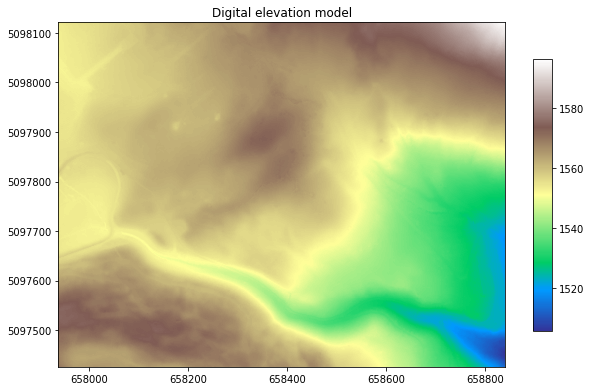

In [17]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_title('Digital elevation model')
raster_extent = [
    raster_xll, raster_xll + raster_cols * raster_cs,
    raster_yll, raster_yll + raster_rows * raster_cs]
img_plot = ax.imshow(raster_array, extent=raster_extent, cmap='terrain')
cbar = plt.colorbar(img_plot, orientation='vertical', shrink=0.5, aspect=14)
cbar.set_label('')
plt.show()